In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('notebook')

import matplotlib as mpl
sns.set('paper')
sns.set_style('ticks')
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12)

In [7]:
# load log traces

tasks = ['stroop', 'nback']
traces = []

for task in tasks:
    trace = pd.read_csv(f'outputs/loss_traces/{task}.csv')
    trace['task'] = task
    traces.append(trace)
    
traces = pd.concat(traces)
traces.columns = ['wall_time', 'epoch', 'val_loss', 'task']

/tmp/ipykernel_6365/1241664484.py:6: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x7f2949190d30> starts with '_'. It is thus excluded from the legend.
  g.legend(title='Task', loc='upper right', labels=['Stroop', '_', 'N-Back'])


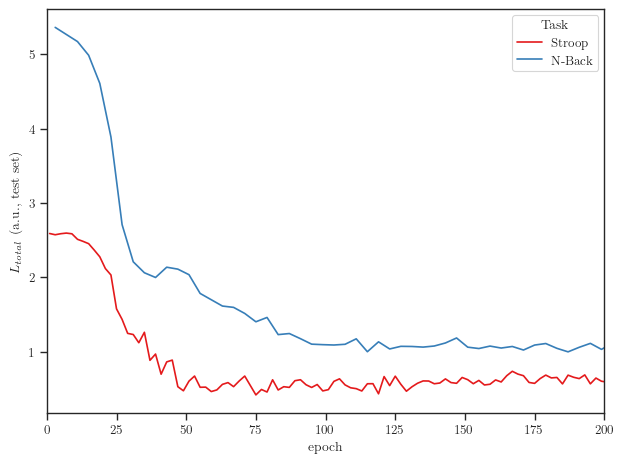

In [25]:
g = sns.lineplot(x='epoch', y='val_loss', data=traces, hue='task', palette='Set1')

g.set_xlim(0, 200)
g.set(ylabel='$L_{total}$ (a.u., test set)')

g.legend(title='Task', loc='upper right', labels=['Stroop', '_', 'N-Back'])

# plt.suptitle('CogPonder demonstrates comparable learning curves to humans.')
plt.tight_layout()
plt.savefig('outputs/figures/figure2.png', bbox_inches='tight', dpi=300)
plt.show()